觉得处理异常太麻烦，直接 catch 然后包装一个 RuntimeException 一路抛了上去。这样对吗? 肯定是不对的. 对于异常就是一句话: 该出手时就出手. 

在这简单介绍使用 checked exceptions 的最佳时机, 然后说明如何在 lambda 表达式中更加优雅的处理 checked exceptions.

# 使用 Checked Exceptions 的最佳时机
---

《Effective Java》中 Item 70:

> Use **checked exceptions for** recoverable conditions and **runtime exceptions for** programming errors. By throwing a checked exception, you force the caller to handle the exception in a catch clause or to propagate it outward. 

使用 checked exception 简单的指导原则：**异常是否可恢复**，简而言之即调用方是否有能力处理异常，并做出积极的响应，最终从异常中恢复。例如尝试打开一个不存在的文件，异常被调用方捕捉后，提示用户重新输入文件路径，也是一种所谓的 recoverable conditions。否则如果因为编程错误等，无法恢复的情况，**则使用 runtime exceptions** 尽早让程序结束掉更为合适。

其实这些在上一篇文章里都讲到了, 在这像是重复了一遍, 再来上个图, 因为它很重要:

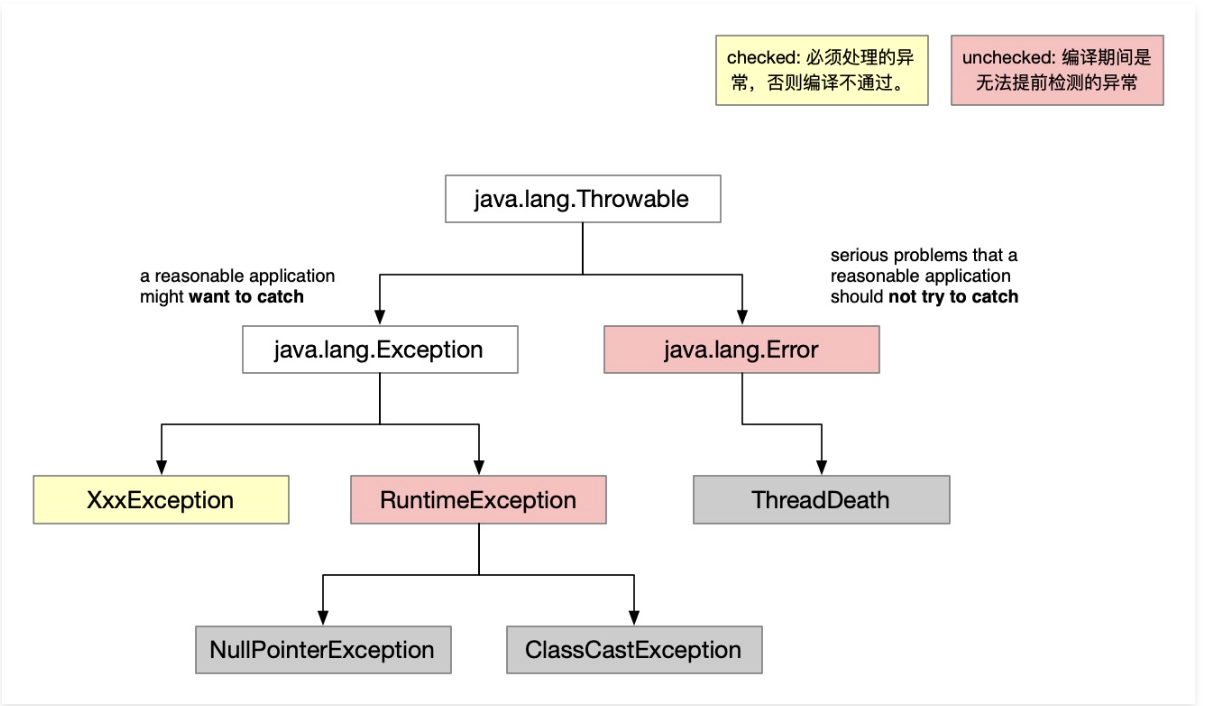

# When to Use Checked Exceptions and Unchecked Exceptions
---

上一篇提到遇到了unrecoverable exceptions应该用runtime exception包装一下checked exception可以去终止程式运行(如果你愿意), 那并不是说所有的exception都应该被终止, 有的可能是可恢复的(上一篇也举了例子). 

> “If a client can reasonably be expected to recover from an exception, make it a checked exception. If a client cannot do anything to recover from the exception, make it an unchecked exception.” https://docs.oracle.com/javase/tutorial/essential/exceptions/runtime.html

For example, before we open a file, we can first validate the input file name. If the user input file name is invalid, we can **throw a custom checked exception**:

```java
if (!isCorrectFileName(fileName)) {
    throw new IncorrectFileNameException("Incorrect filename : " + fileName );
}
```
In this way, we can **recover** the system by accepting another user input file name.

However, if the input file name is a null pointer or it is an empty string, it means that we have some errors in the code. In this case, we should throw an unchecked exception:

```java
if (fileName == null || fileName.isEmpty())  {
    throw new NullOrEmptyException("The filename is null or empty.");
}
```

这只是举个例子什么时候该抛checked exception(错误可恢复的时候), 什么时候该抛unchecked exception, 遇到第二种情况也可以直接警告重输, 不用抛出异常. 



# Java设计出checked exception有必要吗？
---

在上一篇文章说到了这个问题, 这里再补充一点新的东西(这个回答是在知乎看到的):

现在很多程序员还是信奉desigh by contract的思路，觉得checked exception是可以有效提高软件质量和项目可维护性的。但尽管如此，现在更多程序员倾向认为这种设计弊大于利。

> At the beginning you feel safer with them, but later they prevent you from swimming quickly.

尤其是到了java 8的时代，在使用lambda和streams的时候，checked exception就变得十分的讨厌。本来可以简单写成一行的调用，为了一个checked exception， 就要加入try/catch。所以现在有人就建议不在public method的签名中声明任何checked exception。（如果你熟悉java的历史，其实就在几年前我们还是鼓动checked exception用在public方法的签名中的，而unchecked exception一般用在私有逻辑中，所以现在是调换过来了。）

但为了兼容以前的设计接口，我们还是难免会遇到checked exception。其中一个的做法是把checked exception包在一个runtime exception再往上仍。不过这里还有更高明的做法：

好了下面引出回答里的那篇文章, 现在看看到底该怎么解决:


# 如何解决Lambda抛出异常问题
---

